In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('cost_data.csv')
df.head()

,Topography,Construction Type,Amount of Land (sqft),Land Price per sqft,Number of Floors,Architectural Style,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Raw Materials Cost per sqft,Flooring Cost per sqft,Ceiling Cost per sqft,Plumbing Cost per sqft,Wiring Cost per sqft,Price
0,suburban,residential,3877,2495,2,modern,low,Furnished,basic,3682,1615,1454,436,176,191,170,19235005
1,rural,commercial,4605,295,7,modern,low,Furnished,luxury,4368,1701,1086,551,91,292,108,35867796
2,urban,commercial,4294,6346,5,contemporary,low,Non-Furnished,standard,4075,1570,1443,387,164,199,157,49036505
3,metropolitan,residential,10388,41568,1,contemporary,medium,Furnished,standard,9868,1625,1068,386,57,231,118,420079286
4,rural,commercial,7467,846,13,contemporary,medium,Non-Furnished,standard,7085,1747,1133,418,132,252,140,75827743


In [3]:
df['Total Construction Cost'] = df['Construction Cost per sqft'] * df['Building Area (sqft)']
df['Total Land Cost'] = df['Amount of Land (sqft)'] * df['Land Price per sqft']
df['Total Raw Materials Cost'] = abs(df['Price'] - (df['Total Land Cost'] + df['Total Construction Cost']))
df.head()

,Topography,Construction Type,Amount of Land (sqft),Land Price per sqft,Number of Floors,Architectural Style,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Raw Materials Cost per sqft,Flooring Cost per sqft,Ceiling Cost per sqft,Plumbing Cost per sqft,Wiring Cost per sqft,Price,Total Construction Cost,Total Land Cost,Total Raw Materials Cost
0,suburban,residential,3877,2495,2,modern,low,Furnished,basic,3682,1615,1454,436,176,191,170,19235005,5946430,9673115,3615460
1,rural,commercial,4605,295,7,modern,low,Furnished,luxury,4368,1701,1086,551,91,292,108,35867796,7429968,1358475,27079353
2,urban,commercial,4294,6346,5,contemporary,low,Non-Furnished,standard,4075,1570,1443,387,164,199,157,49036505,6397750,27249724,15389031
3,metropolitan,residential,10388,41568,1,contemporary,medium,Furnished,standard,9868,1625,1068,386,57,231,118,420079286,16035500,431808384,27764598
4,rural,commercial,7467,846,13,contemporary,medium,Non-Furnished,standard,7085,1747,1133,418,132,252,140,75827743,12377495,6317082,57133166


In [4]:
df.shape

(3592, 20)

In [5]:
df.drop(columns=['Architectural Style', 
                 'Raw Materials Cost per sqft', 'Flooring Cost per sqft', 'Ceiling Cost per sqft', 
                 'Plumbing Cost per sqft', 'Wiring Cost per sqft'], inplace=True)
df.head()

,Topography,Construction Type,Amount of Land (sqft),Land Price per sqft,Number of Floors,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Price,Total Construction Cost,Total Land Cost,Total Raw Materials Cost
0,suburban,residential,3877,2495,2,low,Furnished,basic,3682,1615,19235005,5946430,9673115,3615460
1,rural,commercial,4605,295,7,low,Furnished,luxury,4368,1701,35867796,7429968,1358475,27079353
2,urban,commercial,4294,6346,5,low,Non-Furnished,standard,4075,1570,49036505,6397750,27249724,15389031
3,metropolitan,residential,10388,41568,1,medium,Furnished,standard,9868,1625,420079286,16035500,431808384,27764598
4,rural,commercial,7467,846,13,medium,Non-Furnished,standard,7085,1747,75827743,12377495,6317082,57133166


In [6]:
df.columns

Index(['Topography', 'Construction Type', 'Amount of Land (sqft)',
       'Land Price per sqft', 'Number of Floors',
       'Quality Level of Raw Materials', 'Furnished', 'Luxury Level',
       'Building Area (sqft)', 'Construction Cost per sqft', 'Price',
       'Total Construction Cost', 'Total Land Cost',
       'Total Raw Materials Cost'],
      dtype='object')

In [7]:
columns_wanted = ['Total Land Cost','Total Construction Cost','Total Raw Materials Cost','Price']
cost_df = df[columns_wanted].copy()
cost_df.head()

,Total Land Cost,Total Construction Cost,Total Raw Materials Cost,Price
0,9673115,5946430,3615460,19235005
1,1358475,7429968,27079353,35867796
2,27249724,6397750,15389031,49036505
3,431808384,16035500,27764598,420079286
4,6317082,12377495,57133166,75827743


In [8]:
con_type_mapping = {'residential' : 0, 'commercial' : 1}
topography_mapping = {'rural': 0, 'suburban': 1, 'urban': 2, 'metropolitan': 3}
construction_type_mapping = {'commercial': 0, 'residential': 1}
architectural_style_mapping = {'modern': 0, 'traditional': 1, 'contemporary': 2}
quality_mapping = {'low': 0, 'medium': 1, 'high': 2}
furnished_mapping = {'Non-Furnished': 0, 'Furnished': 1}
luxury_level_mapping = {'basic': 0, 'standard': 1, 'luxury': 2}

df.replace({'Construction Type': con_type_mapping,
            'Topography': topography_mapping,
            'Construction Type': construction_type_mapping,
            'Architectural Style': architectural_style_mapping,
            'Quality Level of Raw Materials': quality_mapping,
            'Furnished': furnished_mapping,
            'Luxury Level': luxury_level_mapping}, inplace=True)

In [9]:
df.head()

,Topography,Construction Type,Amount of Land (sqft),Land Price per sqft,Number of Floors,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Price,Total Construction Cost,Total Land Cost,Total Raw Materials Cost
0,1,1,3877,2495,2,0,1,0,3682,1615,19235005,5946430,9673115,3615460
1,0,0,4605,295,7,0,1,2,4368,1701,35867796,7429968,1358475,27079353
2,2,0,4294,6346,5,0,0,1,4075,1570,49036505,6397750,27249724,15389031
3,3,1,10388,41568,1,1,1,1,9868,1625,420079286,16035500,431808384,27764598
4,0,0,7467,846,13,1,0,1,7085,1747,75827743,12377495,6317082,57133166


In [10]:
X = df[['Topography', 'Construction Type','Number of Floors', 'Building Area (sqft)', 
        'Quality Level of Raw Materials', 'Furnished', 'Luxury Level']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

models = {'Linear Regression': linear_model, 'Decision Tree': tree_model, 'Random Forest': forest_model}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} - Score: {score}")

Linear Regression - Score: 0.7036013383900028
Decision Tree - Score: 0.8510261123345022
Random Forest - Score: 0.9183151210252412


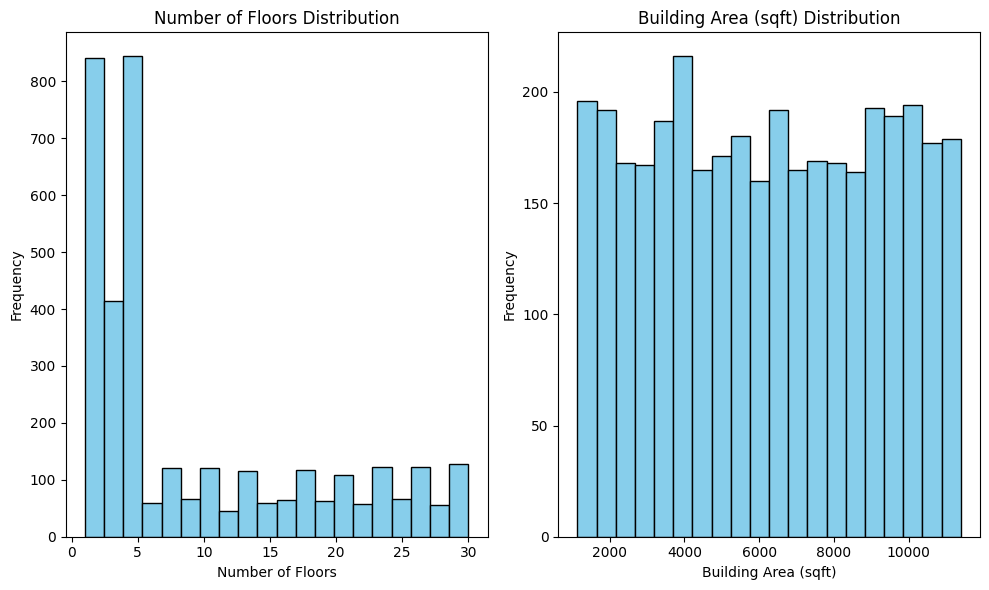

In [11]:
numerical_features = ['Number of Floors', 'Building Area (sqft)']
plt.figure(figsize=(10, 6))

for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(1, 2, i)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


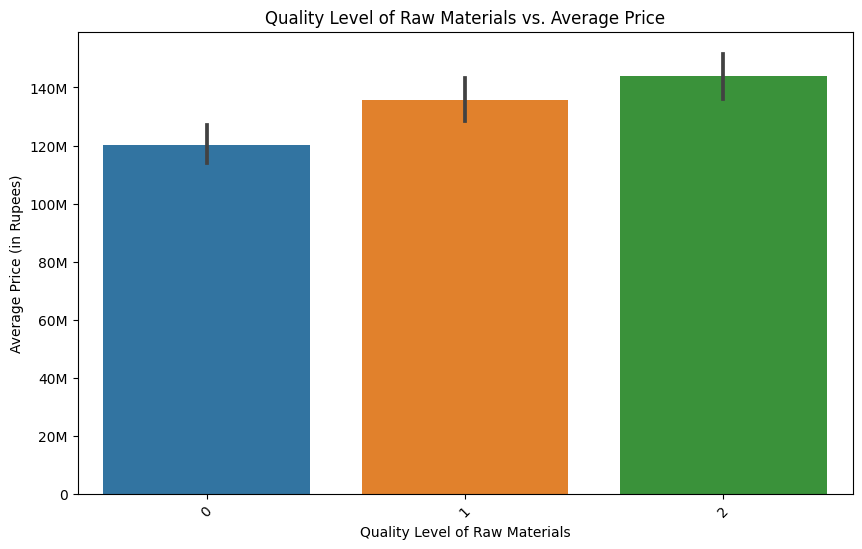

In [12]:
import matplotlib.ticker as ticker
def format_price(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.0f}M'
    else:
        return f'{x:.0f}'

plt.figure(figsize=(10, 6))
sns.barplot(x='Quality Level of Raw Materials', y='Price', data=df, estimator=np.mean)
formatter = ticker.FuncFormatter(format_price)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Quality Level of Raw Materials vs. Average Price')
plt.xlabel('Quality Level of Raw Materials')
plt.ylabel('Average Price (in Rupees)')
plt.xticks(rotation=45)
plt.show()

C:\Users\91994\Pictures\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


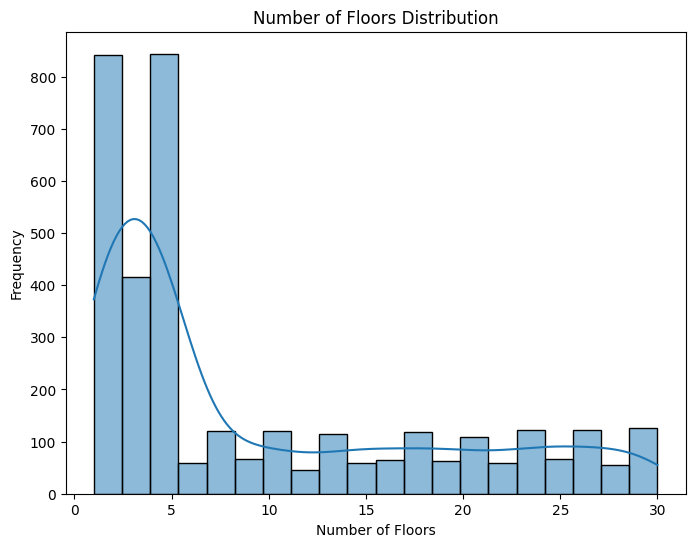

C:\Users\91994\Pictures\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


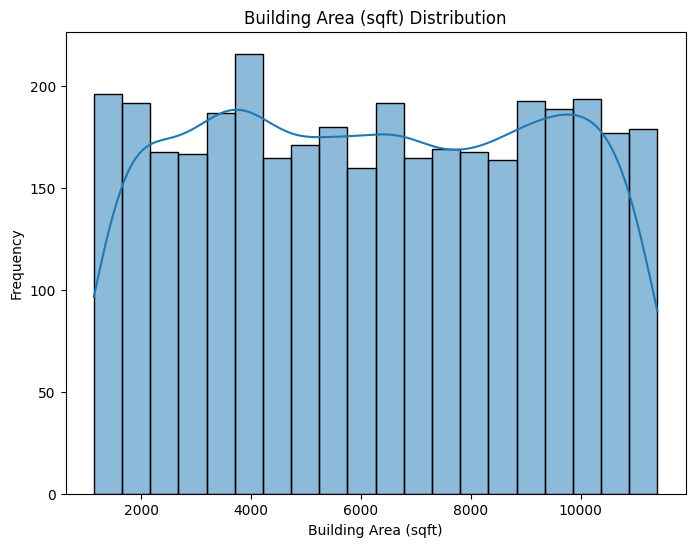

In [13]:
numerical_features = ['Number of Floors', 'Building Area (sqft)']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


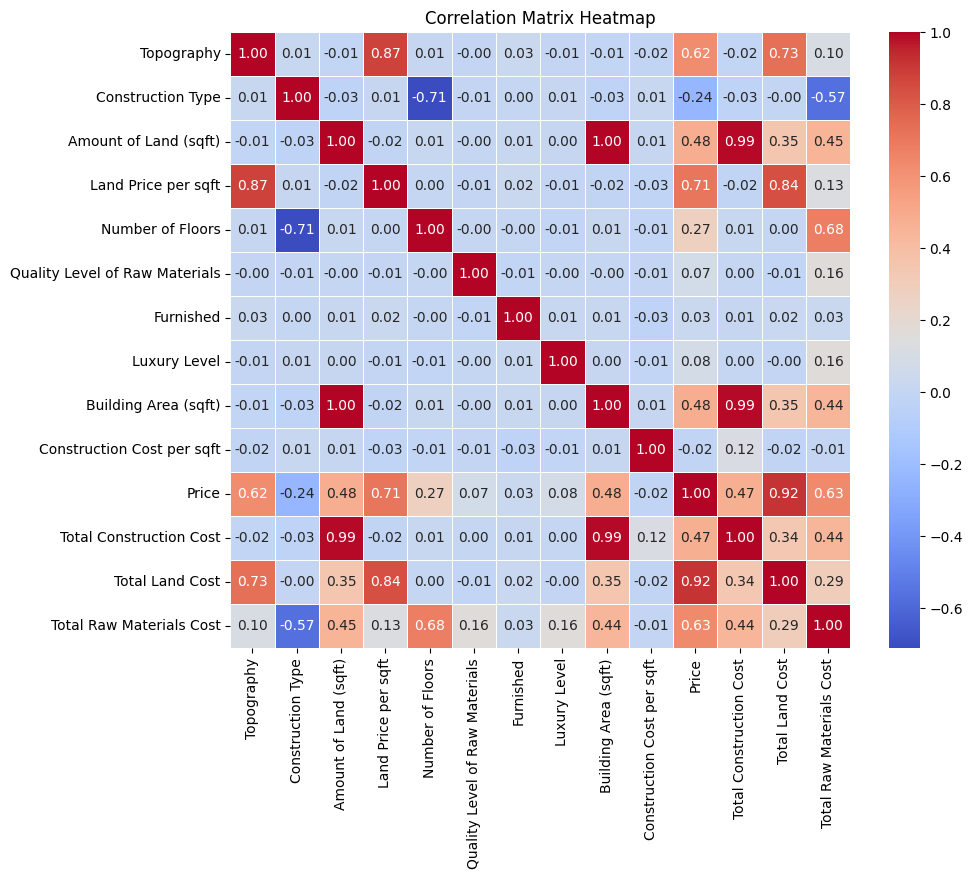

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
predicted_price = forest_model.predict([[3, 1, 10, 4500, 2, 1, 2]])
print("Predicted price:", predicted_price[0])

Predicted price: 255844840.78


C:\Users\91994\Pictures\New folder\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [16]:
def predict_price(location, type, floor, sqft, quality, furnished, luxury):
    x = np.zeros(len(X.columns))
    x[0] = location
    x[1] = type
    x[2] = floor
    x[3] = sqft
    x[4] = quality
    x[5] = furnished
    x[6] = luxury

    return forest_model.predict([x])[0]


In [17]:
print(predict_price(3, 0, 2, 3000, 2, 1, 2))

152208968.04


C:\Users\91994\Pictures\New folder\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


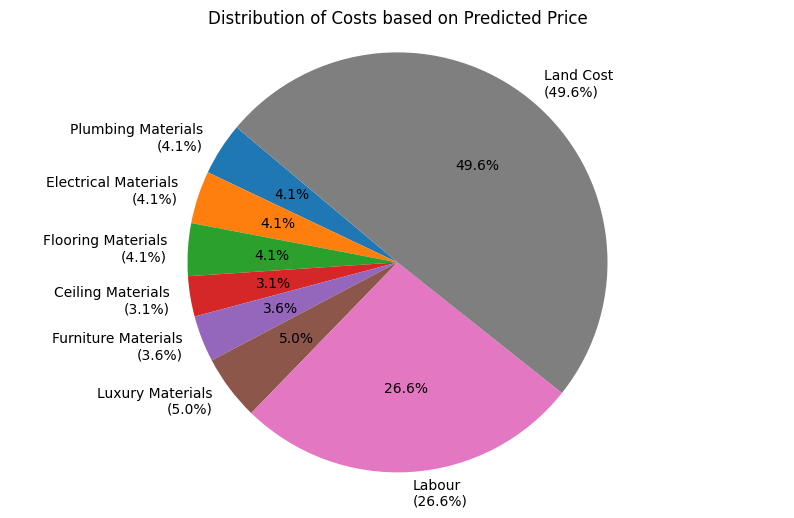

In [18]:
p = 0.2385

plumbing_cost = predicted_price * p * 0.17
electrical_cost = predicted_price * p * 0.17
flooring_cost = predicted_price * p * 0.17
ceiling_cost = predicted_price * p * 0.13
furniture_cost = predicted_price * p * 0.15
luxury_cost = predicted_price * p * 0.21

labour = predicted_price * 0.2658
land_cost = predicted_price * 0.4957

plumbing_cost = plumbing_cost[0]
electrical_cost = electrical_cost[0]
flooring_cost = flooring_cost[0]
ceiling_cost = ceiling_cost[0]
furniture_cost = furniture_cost[0]
luxury_cost = luxury_cost[0]

costs = list(map(float, [plumbing_cost, electrical_cost, flooring_cost, ceiling_cost,
                         furniture_cost, luxury_cost, labour, land_cost]))
labels = ['Plumbing Materials', 'Electrical Materials', 'Flooring Materials', 'Ceiling Materials',
          'Furniture Materials', 'Luxury Materials', 'Labour', 'Land Cost']
total_cost = sum(costs)

percentages = [(cost / total_cost) * 100 for cost in costs]
labels_with_percentage = [f'{label}\n({percent:.1f}%)' for label, percent in zip(labels, percentages)]

plt.figure(figsize=(10, 6))
plt.pie(costs, labels=labels_with_percentage, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Costs based on Predicted Price')
plt.axis('equal')
plt.show()


In [19]:
import pickle
with open('ConstructionCostEstimator.pkl','wb') as f:
    pickle.dump(forest_model,f)

In [20]:
model = pickle.load(open('ConstructionCostEstimator.pkl', 'rb'))

In [21]:
model.predict([[3, 1, 10, 4500, 2, 1, 2]])

C:\Users\91994\Pictures\New folder\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.55844841e+08])